In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 单样本t-test
常用于比较样本和总体的均值是否一样。

> 下面的 **`loc`** 参数实际上就是基数的意思。 **`mu`** 参数会在这个loc参数上面进行加来表示总的次数。

In [2]:
np.random.seed(2016)
population_salary1 = stats.poisson.rvs(loc=1000, mu=4500, size=150000)
population_salary2 = stats.poisson.rvs(loc=1000, mu=3000, size=100000)
population_salary = np.concatenate((population_salary1, population_salary2))
cd_salary1 = stats.poisson.rvs(loc=1000, mu=3000, size=30)
cd_salary2 = stats.poisson.rvs(loc=1000, mu=3500, size=20)
cd_salary = np.concatenate((cd_salary1, cd_salary2))
print(population_salary.mean())
print(cd_salary.mean())

4900.062208
4198.5


> * 在使用 **`stats.ttest_1samp`** 是做单一样本t检验，其中的参数 **`a`** 表示我们的单一样本对象，而参数 **`popmean`** 是我们总体的均值。
> * 在得到的结果中 **`pvalue`** 是我们的p值，总体的假设是相同，如果取得的结果很小的话，就表示之前的假设为假。

In [3]:
stats.ttest_1samp(a=cd_salary, popmean=population_salary.mean())

Ttest_1sampResult(statistic=-18.332508356481146, pvalue=1.401937971050218e-23)

In [4]:
stats.t.ppf(q=0.025,df=49)     # 构造95%的置信区间。 这个是左侧的。

-2.0095752344892093

In [5]:
stats.t.ppf(q=0.975, df=49)     # 30+20-1。 构造95%的置信区间。这个是除了右边2.5%的。

2.0095752344892088

In [7]:
stats.t.cdf(x=19.318, df=49)*2

2.0

In [8]:
sigma = cd_salary.std()/ math.sqrt(50)
stats.t.interval(0.95, df=49, loc=cd_salary.mean(), scale=sigma)

(4122.3689880749052, 4274.6310119250948)

## 双样本t-test
就是比较两个样本的均值是否有显著性差异。

In [10]:
np.random.seed(2016)
cq_salary1 = stats.poisson.rvs(loc=1000, mu=3300, size=30)
cq_salary2 = stats.poisson.rvs(loc=1000, mu=2300, size=20)
cq_salary = np.concatenate((cq_salary1, cq_salary2))
print(cq_salary.mean())

3892.4


> 在进行双样本t检验的时候，scipy为我们提供了 **`stats.ttest_ind`** 方法，其中的参数 **`a`** 和 **`b`** 是表示两个样本，而参数 **`equal_var`** 表示的是是否 **`有相同的方差`** 的检验。

In [11]:
stats.ttest_ind(a=cd_salary, b=cq_salary, equal_var=False)    # 是否是相同的variance

Ttest_indResult(statistic=3.8106072785123639, pvalue=0.00028077830201706758)

## paired-test
数据之间有相互的关联的关系，比如吃药对体重的影响。

In [12]:
np.random.seed(2016)
before = stats.norm.rvs(loc=60, size=100)
after = before + stats.norm.rvs(loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before, "weight_after":after, "weight_change": before-after})
weight_df.describe()

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,58.630430,59.952022,1.321592
std,1.314275,0.961598,1.002293
min,55.953805,57.865425,-0.609435
25%,57.682933,59.301934,0.570082
50%,58.731642,59.837506,1.315559
75%,59.406286,60.707960,2.032967
max,61.640888,62.427961,3.564753


> 关于这种相关的T检验的话，可以使用scipy提供的 **`stats.ttest_rel`** 来进行这种比较的操作，其中的参数 **`a`** 和 **`b`** 表示要进行检验的相关的变量。

In [13]:
stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=13.185686571090971, pvalue=1.5966654846554254e-23)

In [14]:
weight_df

,weight_after,weight_before,weight_change
0,57.006240,60.294854,3.288614
1,59.195722,60.508038,1.312316
2,59.864078,60.704740,0.840662
3,59.435102,60.826131,1.391028
4,60.193747,62.135452,1.941705
5,58.347267,59.432162,1.084895
6,60.476824,60.735234,0.258410
7,57.469703,59.030005,1.560302
8,57.698392,60.694236,2.995844
9,60.560296,61.371332,0.811036


## type 1/type 2错误

假设检验是反证法的思想，依据样本统计量作出的统计推断，其推断结论并非绝对正确，结论有时也可能有错误，错误分为两类。<br/>

* 第一类错误（typeⅠerror），Ⅰ型错误，拒绝了实际上成立的H0，，即错误地判为有差别，这种弃真的错误称为Ⅰ型错误。其概率大小用即检验水准用α表示。α可取单尾也可取双尾。假设检验时可根据研究目的来确定其大小，一般取0．05，当拒绝H0时则理论上理论100次检验中平均有5次发生这样的错误．。
* 第二类错误（typeⅡ error）。Ⅱ型错误，接受了实际上不成立的H0 ，也就是错误地判为无差别，这类取伪的错误称为第二类错误。第二类错误的概率用β表示，β的大小很难确切估计。当样本例数固定时，α愈小，β愈大；反之，α愈大，β愈小。因而可通过选定α控制β大小。要同时减小α和β，唯有增加样本例数。统计上将1－β称为检验效能或把握度（power of a test），即两个总体确有差别存在，而以α为检验水准，假设检验能发现它们有差别的能力。实际工作中应权衡两类错误中哪一个重要以选择检验水准的大小。

> 在下面使用 **`stats.norm.pdf`** 的时候，其中的参数： **`loc`** 表示的**均值** ；而连一个参数 **`scale`** 表示的是**标准差** 。

Text(0,0.02,'Type 2 Error')

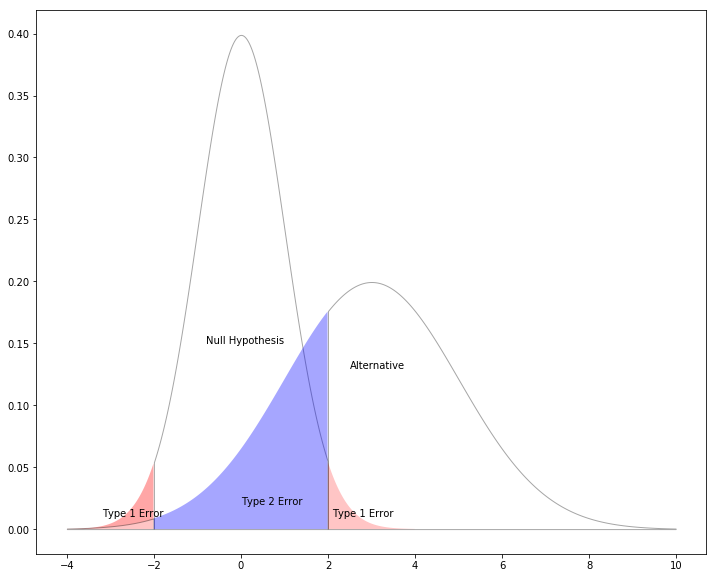

In [25]:
plt.figure(figsize=(12,10))
plt.fill_between(x=np.arange(-4,-2,0.01), y1=stats.norm.pdf(np.arange(-4,-2,0.01)), facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01), y1=stats.norm.pdf(np.arange(-2,2,0.01)), facecolor='white', alpha=0.35, edgecolor='black')
plt.fill_between(x=np.arange(2,4,0.01), y1=stats.norm.pdf(np.arange(2,4,0.01)), facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(-4,-2,0.01), y1=stats.norm.pdf(np.arange(-4,-2,0.01), loc=3, scale=2), facecolor='white', alpha=0.35, edgecolor='black')
plt.fill_between(x=np.arange(-2,2,0.01), y1=stats.norm.pdf(np.arange(-2,2,0.01), loc=3, scale=2), facecolor='blue',alpha=0.35)
plt.fill_between(x=np.arange(2,10,0.01), y1=stats.norm.pdf(np.arange(2,10,0.01), loc=3, scale=2), facecolor='white', alpha=0.35, edgecolor='black')
plt.text(x=-0.8, y=0.15, s="Null Hypothesis")
plt.text(x=2.5,y=0.13, s="Alternative")
plt.text(x=2.1, y=0.01, s="Type 1 Error")
plt.text(x=-3.2, y=0.01, s="Type 1 Error")
plt.text(x=0, y=0.02, s="Type 2 Error")

In [26]:
# Lower cutoff value
lower_quantile = stats.norm.ppf(0.025)
# Upper cutoff value
upper_quantile = stats.norm.ppf(0.975)

# Area under alternative
low = stats.norm.cdf(lower_quantile, loc=3, scale=2)
high = stats.norm.cdf(upper_quantile, loc=3, scale=2)
high - low

0.29495606111232298